In [30]:
# Cell 1: Import essential libraries
import os
import pandas as pd

# Get desktop path
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
project_folder = os.path.join(desktop_path, 'f1_project')

# Create project folder if it doesn't exist
if not os.path.exists(project_folder):
    os.makedirs(project_folder)
    print(f"Created project folder: {project_folder}")
else:
    print(f"Project folder already exists: {project_folder}")

# List files in project folder
print("\nFiles in project folder:")
files = os.listdir(project_folder)
if files:
    for file in files:
        print(f"- {file}")
else:
    print("(No files yet - please add the CSV files)")

Project folder already exists: C:\Users\Support\Desktop\f1_project

Files in project folder:
- circuits.csv
- constructors.csv
- constructor_results.csv
- constructor_standings.csv
- drivers.csv
- driver_standings.csv
- f1_analysis.ipynb
- lap_times.csv
- pit_stops.csv
- qualifying.csv
- races.csv
- results.csv
- seasons.csv
- sprint_results.csv
- status.csv


In [53]:
# Cell 2: Load key datasets (Updated)
try:
    # List of essential files
    data_files = {
        "circuits": "circuits.csv",
        "races": "races.csv",
        "drivers": "drivers.csv",
        "results": "results.csv",
        "qualifying": "qualifying.csv",
        "constructors": "constructors.csv"  # ADDED THIS LINE
    }
    
    # Load each file
    data = {}
    for name, filename in data_files.items():
        file_path = os.path.join(project_folder, filename)
        if os.path.exists(file_path):
            data[name] = pd.read_csv(file_path)
            print(f"Loaded {filename} with {len(data[name])} rows")
        else:
            print(f"WARNING: {filename} not found in project folder")
    
    print("\nData loaded successfully!")
    
    # Show sample of circuits data
    if "circuits" in data:
        print("\nCircuits data sample:")
        display(data["circuits"].head(2))
    
except Exception as e:
    print(f"Error loading data: {str(e)}")

Loaded circuits.csv with 77 rows
Loaded races.csv with 1125 rows
Loaded drivers.csv with 861 rows
Loaded results.csv with 26759 rows
Loaded qualifying.csv with 10494 rows
Loaded constructors.csv with 212 rows

Data loaded successfully!

Circuits data sample:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738,18,http://en.wikipedia.org/wiki/Sepang_Internatio...


In [32]:
# Cell 3: Verify data loaded correctly
print("Columns in each dataset:")
for name, df in data.items():
    print(f"\n{name.upper()}:")
    print(df.columns.tolist())

# Check races data
if "races" in data:
    races_df = data["races"]
    print("\nRaces info:")
    print(f"Seasons: {races_df['year'].min()} to {races_df['year'].max()}")
    print(f"Total races: {len(races_df)}")
    print(f"Unique circuits: {races_df['circuitId'].nunique()}")

# Check results and qualifying data
if "results" in data and "qualifying" in data:
    print("\nResults and Qualifying info:")
    print(f"Total qualifying records: {len(data['qualifying'])}")
    print(f"Total race results: {len(data['results'])}")

Columns in each dataset:

CIRCUITS:
['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']

RACES:
['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

DRIVERS:
['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']

RESULTS:
['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

QUALIFYING:
['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3']

Races info:
Seasons: 1950 to 2024
Total races: 1125
Unique circuits: 77

Results and Qualifying info:
Total qualifying records: 10494
Total race results: 26759


In [33]:
# Cell 4: Merge and analyze qualifying vs race results
try:
    # Merge qualifying and results
    merged = pd.merge(
        data["qualifying"][['raceId', 'driverId', 'position']],
        data["results"][['raceId', 'driverId', 'position']],
        on=['raceId', 'driverId'],
        suffixes=('_qual', '_race')
    )
    
    # Clean the data - remove non-numeric positions (DNF, DNS, etc.)
    merged = merged[merged['position_qual'].apply(lambda x: str(x).isdigit())]
    merged = merged[merged['position_race'].apply(lambda x: str(x).isdigit())]
    
    # Convert to integers
    merged = merged.astype({
        'position_qual': int,
        'position_race': int
    })
    
    # Calculate positions gained
    merged['positions_gained'] = merged['position_qual'] - merged['position_race']
    
    # Basic statistics
    print("\nAnalysis Results:")
    print(f"Total races analyzed: {merged['raceId'].nunique()}")
    print(f"Total driver entries: {len(merged)}")
    print(f"Average positions gained: {merged['positions_gained'].mean():.2f}")
    print(f"Best improvement: {merged['positions_gained'].max()} positions")
    print(f"Worst decline: {merged['positions_gained'].min()} positions")
    
    # Show sample data
    print("\nSample of merged data:")
    display(merged.head(3))
    
except Exception as e:
    print(f"Error during analysis: {str(e)}")


Analysis Results:
Total races analyzed: 494
Total driver entries: 8050
Average positions gained: 1.71
Best improvement: 19 positions
Worst decline: -18 positions

Sample of merged data:


,raceId,driverId,position_qual,position_race,positions_gained
0,18,1,1,1,0
2,18,5,3,5,-2
4,18,2,5,2,3


In [34]:
# Cell 5: Install visualization packages
!pip install matplotlib seaborn

# Then import them
import matplotlib.pyplot as plt
import seaborn as sns

# Setup visualization defaults
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style("whitegrid")

print("Visualization packages installed and configured!")

Visualization packages installed and configured!


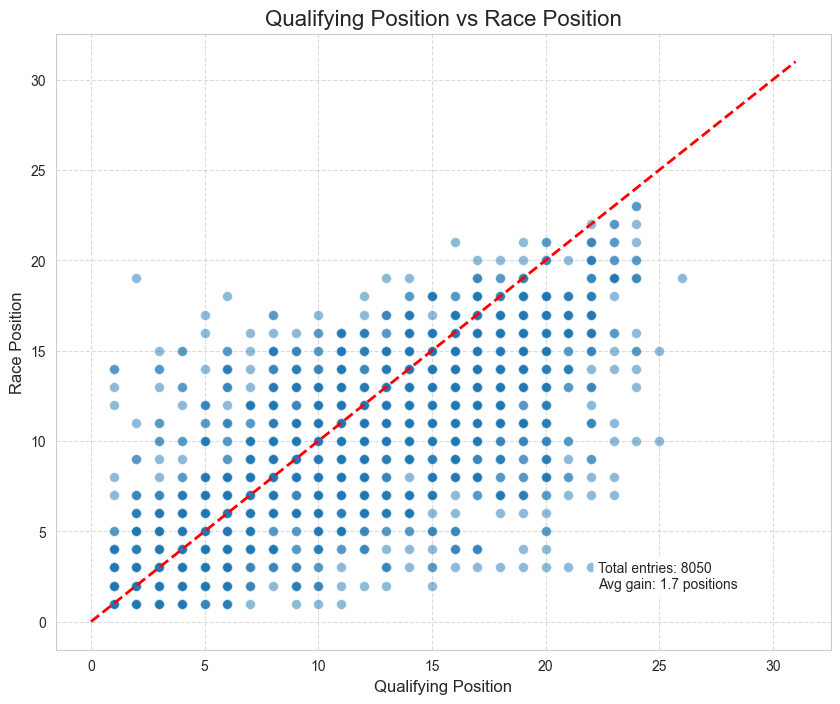

In [35]:
# Cell 6: Qualifying vs Race Position Scatter Plot
try:
    plt.figure(figsize=(10, 8))
    
    # Create a scatter plot (using a sample for better performance)
    sample_data = merged.sample(2000) if len(merged) > 2000 else merged
    sns.scatterplot(
        x='position_qual', 
        y='position_race', 
        data=sample_data,
        alpha=0.5,
        s=50  # point size
    )
    
    # Add reference line (where qual position = race position)
    max_position = max(sample_data['position_qual'].max(), sample_data['position_race'].max())
    plt.plot([0, max_position+5], [0, max_position+5], 'r--', linewidth=2)
    
    plt.title("Qualifying Position vs Race Position", fontsize=16)
    plt.xlabel("Qualifying Position", fontsize=12)
    plt.ylabel("Race Position", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add statistics to plot
    stats_text = f"Total entries: {len(merged)}\nAvg gain: {merged['positions_gained'].mean():.1f} positions"
    plt.annotate(stats_text, xy=(0.7, 0.1), xycoords='axes fraction', 
                 bbox=dict(boxstyle="round", fc="w"))
    
    plt.show()
    
except Exception as e:
    print(f"Visualization error: {str(e)}")


Top 10 circuits where drivers gain the most positions:


,mean,count
name,,
Adelaide Street Circuit,6.550000,20
Indianapolis Motor Speedway,4.432836,67
Okayama International Circuit,4.285714,28
Autódromo Juan y Oscar Gálvez,3.954545,44
Autódromo do Estoril,3.484848,33
Autodromo Internazionale del Mugello,2.583333,12
Fuji Speedway,2.566667,30
Albert Park Grand Prix Circuit,2.378698,338
Nürburgring,2.350575,174



Top 10 circuits where drivers lose the most positions:


,mean,count
name,,
Bahrain International Circuit,1.089431,369
Losail International Circuit,1.080000,50
Jeddah Corniche Circuit,1.030769,65
Yas Marina Circuit,0.975779,289
Circuit Paul Ricard,0.739726,73
Istanbul Park,0.658537,164
Las Vegas Strip Street Circuit,0.594595,37
Circuit Park Zandvoort,0.547945,73
Miami International Autodrome,0.500000,56


C:\Users\Support\AppData\Local\Temp\ipykernel_10444\4242201076.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




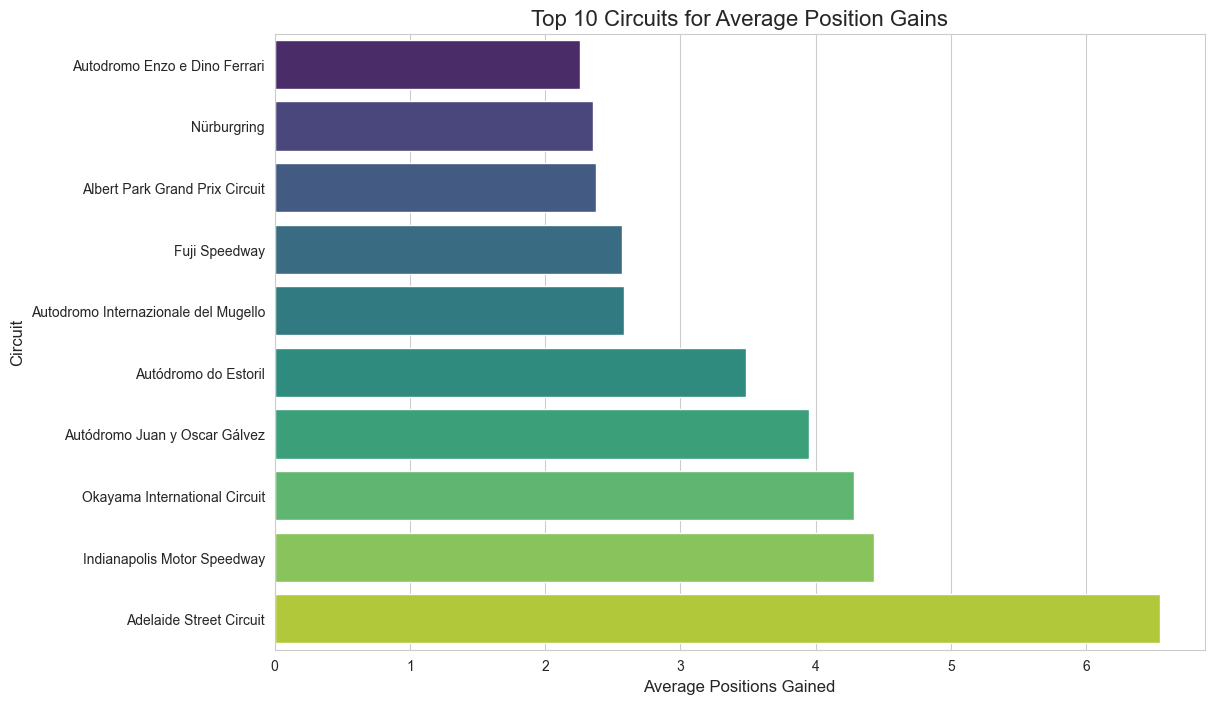

In [36]:
# Cell 7: Analyze position changes by circuit
try:
    # Merge with races and circuits
    merged_with_circuits = pd.merge(
        merged,
        data["races"][['raceId', 'circuitId', 'year']],
        on='raceId'
    )
    merged_with_circuits = pd.merge(
        merged_with_circuits,
        data["circuits"][['circuitId', 'name']],
        on='circuitId'
    )
    
    # Calculate average positions gained per circuit
    circuit_analysis = merged_with_circuits.groupby('name')['positions_gained'].agg(['mean', 'count'])
    circuit_analysis = circuit_analysis.sort_values('mean', ascending=False)
    
    print("\nTop 10 circuits where drivers gain the most positions:")
    display(circuit_analysis.head(10))
    
    print("\nTop 10 circuits where drivers lose the most positions:")
    display(circuit_analysis.tail(10))
    
    # Visualization: Top 10 circuits for position gains
    plt.figure(figsize=(12, 8))
    top_circuits = circuit_analysis.head(10).sort_values('mean', ascending=True)
    sns.barplot(x='mean', y=top_circuits.index, data=top_circuits, palette='viridis')
    plt.title("Top 10 Circuits for Average Position Gains", fontsize=16)
    plt.xlabel("Average Positions Gained", fontsize=12)
    plt.ylabel("Circuit", fontsize=12)
    plt.show()
    
except Exception as e:
    print(f"Circuit analysis error: {str(e)}")

C:\Users\Support\AppData\Local\Temp\ipykernel_10444\2119034549.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Position changes by regulation era:


,mean,median,count
era,,,
Early Years (1950-1979),NaN,NaN,0
Turbo Era (1980-1992),NaN,NaN,0
V10 Era (1993-2004),3.466929,3.0,1270
V8 Era (2005-2013),1.640208,1.0,2885
Hybrid Era (2014-2020),1.371490,1.0,2315
Ground Effect Era (2021-Present),0.917089,1.0,1580


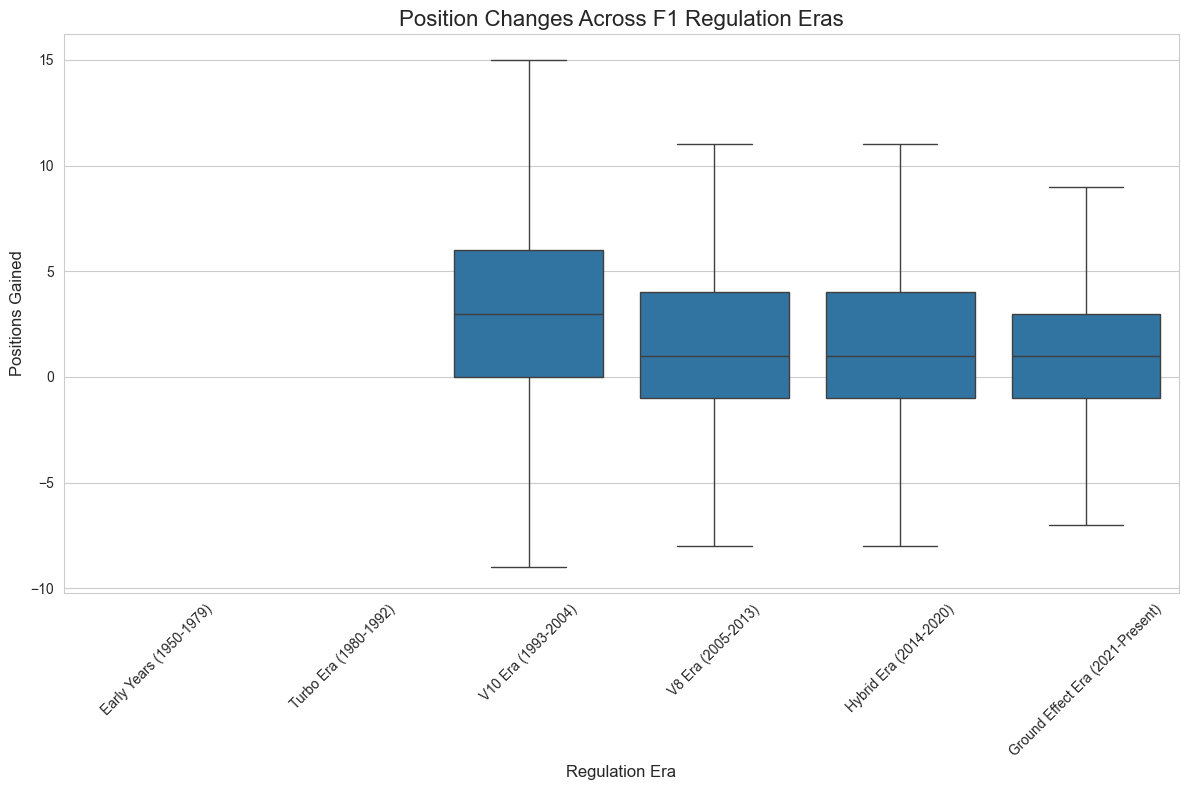

In [37]:
# Cell 8: Era analysis
try:
    # Define regulation eras (based on major F1 rule changes)
    era_bins = [1950, 1980, 1993, 2005, 2014, 2021, 2025]
    era_labels = ['Early Years (1950-1979)', 'Turbo Era (1980-1992)', 
                 'V10 Era (1993-2004)', 'V8 Era (2005-2013)', 
                 'Hybrid Era (2014-2020)', 'Ground Effect Era (2021-Present)']
    
    # Add era to merged data
    merged_with_circuits['era'] = pd.cut(
        merged_with_circuits['year'],
        bins=era_bins,
        labels=era_labels,
        right=False
    )
    
    # Analyze by era
    era_analysis = merged_with_circuits.groupby('era')['positions_gained'].agg(['mean', 'median', 'count'])
    print("\nPosition changes by regulation era:")
    display(era_analysis)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x='era', 
        y='positions_gained', 
        data=merged_with_circuits,
        showfliers=False
    )
    plt.title("Position Changes Across F1 Regulation Eras", fontsize=16)
    plt.xlabel("Regulation Era", fontsize=12)
    plt.ylabel("Positions Gained", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Era analysis error: {str(e)}")


Top 10 drivers by average positions gained (min 50 races):


,driverRef,mean,count
113,panis,3.762712,59
43,ericsson,3.540541,74
87,liuzzi,3.381818,55
76,kobayashi,3.211538,52
55,glock,3.108108,74
141,stroll,2.783217,143
45,fisichella,2.556522,115
136,sato,2.431373,51
83,latifi,2.411765,51
63,heidfeld,2.318182,110


C:\Users\Support\AppData\Local\Temp\ipykernel_10444\1627776663.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




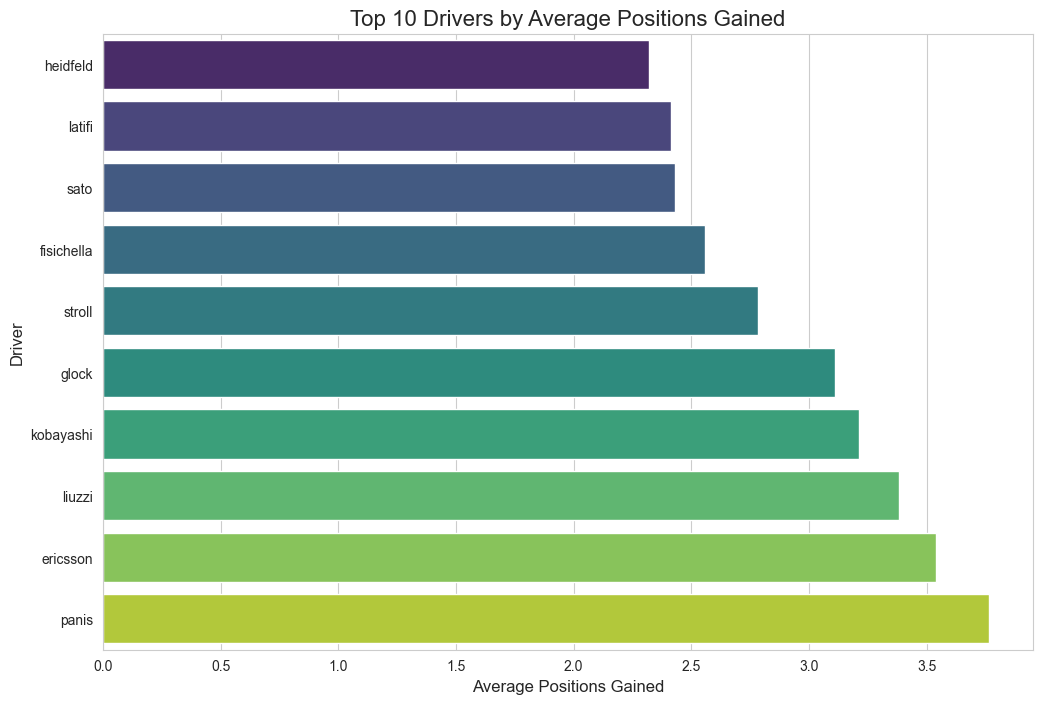

In [38]:
# Cell 9: Driver performance analysis
try:
    # Merge driver names
    merged_with_drivers = pd.merge(
        merged_with_circuits,
        data["drivers"][['driverId', 'driverRef']],
        on='driverId'
    )
    
    # Analyze top drivers (minimum 50 races)
    driver_analysis = merged_with_drivers.groupby('driverRef')['positions_gained'].agg(
        ['mean', 'count']
    ).reset_index()
    driver_analysis = driver_analysis[driver_analysis['count'] >= 50]
    driver_analysis = driver_analysis.sort_values('mean', ascending=False)
    
    print("\nTop 10 drivers by average positions gained (min 50 races):")
    display(driver_analysis.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_drivers = driver_analysis.head(10).sort_values('mean', ascending=True)
    sns.barplot(
        x='mean', 
        y='driverRef', 
        data=top_drivers, 
        palette='viridis'
    )
    plt.title("Top 10 Drivers by Average Positions Gained", fontsize=16)
    plt.xlabel("Average Positions Gained", fontsize=12)
    plt.ylabel("Driver", fontsize=12)
    plt.show()
    
except Exception as e:
    print(f"Driver analysis error: {str(e)}")


Model Evaluation:
Mean Absolute Error: 2.65
R-squared: 0.52

Top 10 Feature Importances:


,Feature,Importance
43,position_qual,0.609303
44,year,0.191807
7,name_Autódromo José Carlos Pace,0.009618
24,name_Hungaroring,0.009596
19,name_Circuit de Spa-Francorchamps,0.009469
13,name_Circuit Gilles Villeneuve,0.009180
38,name_Silverstone Circuit,0.008965
16,name_Circuit de Barcelona-Catalunya,0.008368
1,name_Albert Park Grand Prix Circuit,0.008225
10,name_Bahrain International Circuit,0.008024


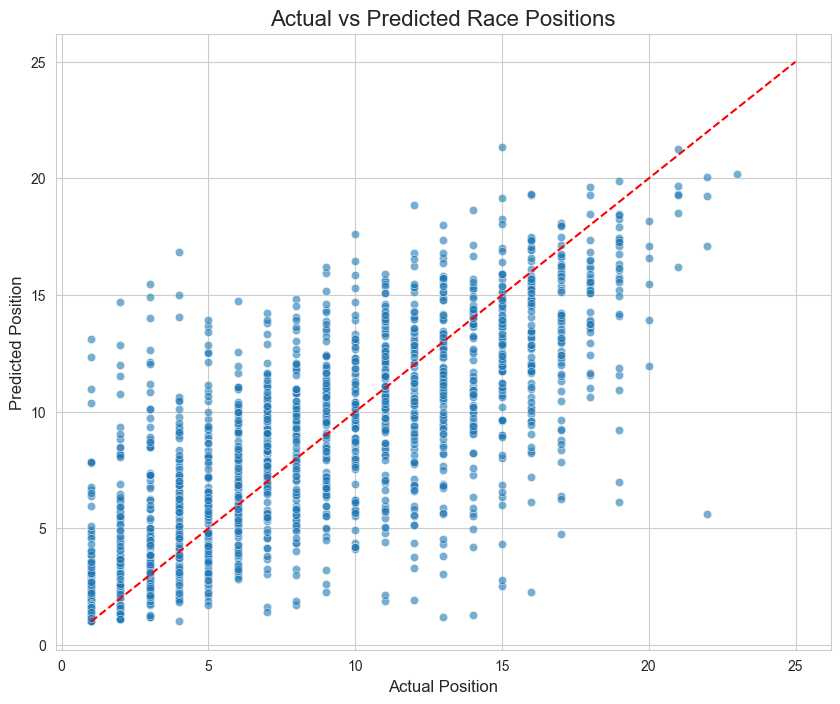

In [39]:
# Cell 10: Predictive modeling (Fixed version)
try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, r2_score
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    
    # Prepare data for modeling
    model_data = merged_with_circuits[['position_qual', 'name', 'year', 'position_race']].copy()
    
    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('circuit', OneHotEncoder(handle_unknown='ignore'), ['name'])
        ],
        remainder='passthrough'
    )
    
    X = model_data[['position_qual', 'name', 'year']]
    y = model_data['position_race']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Preprocess and train model
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_processed, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test_processed)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Evaluation:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # FIXED: Feature importance extraction
    # Get feature names from the preprocessor
    try:
        # For newer sklearn versions
        feature_names = preprocessor.get_feature_names_out()
    except AttributeError:
        # For older sklearn versions
        feature_names = preprocessor.named_transformers_['circuit'].get_feature_names_out(['circuit'])
        feature_names = list(feature_names) + ['position_qual', 'year']
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Clean feature names
    importance_df['Feature'] = importance_df['Feature'].str.replace('circuit__', '')
    importance_df['Feature'] = importance_df['Feature'].str.replace('remainder__', '')
    
    print("\nTop 10 Feature Importances:")
    display(importance_df.head(10))
    
    # Visualization of predictions vs actual
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([1, 25], [1, 25], 'r--')
    plt.title("Actual vs Predicted Race Positions", fontsize=16)
    plt.xlabel("Actual Position", fontsize=12)
    plt.ylabel("Predicted Position", fontsize=12)
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Modeling error: {str(e)}")


Top 10 drivers by average positions gained (min 50 races):


,driverRef,mean,count
113,panis,3.762712,59
43,ericsson,3.540541,74
87,liuzzi,3.381818,55
76,kobayashi,3.211538,52
55,glock,3.108108,74
141,stroll,2.783217,143
45,fisichella,2.556522,115
136,sato,2.431373,51
83,latifi,2.411765,51
63,heidfeld,2.318182,110


C:\Users\Support\AppData\Local\Temp\ipykernel_10444\1627776663.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




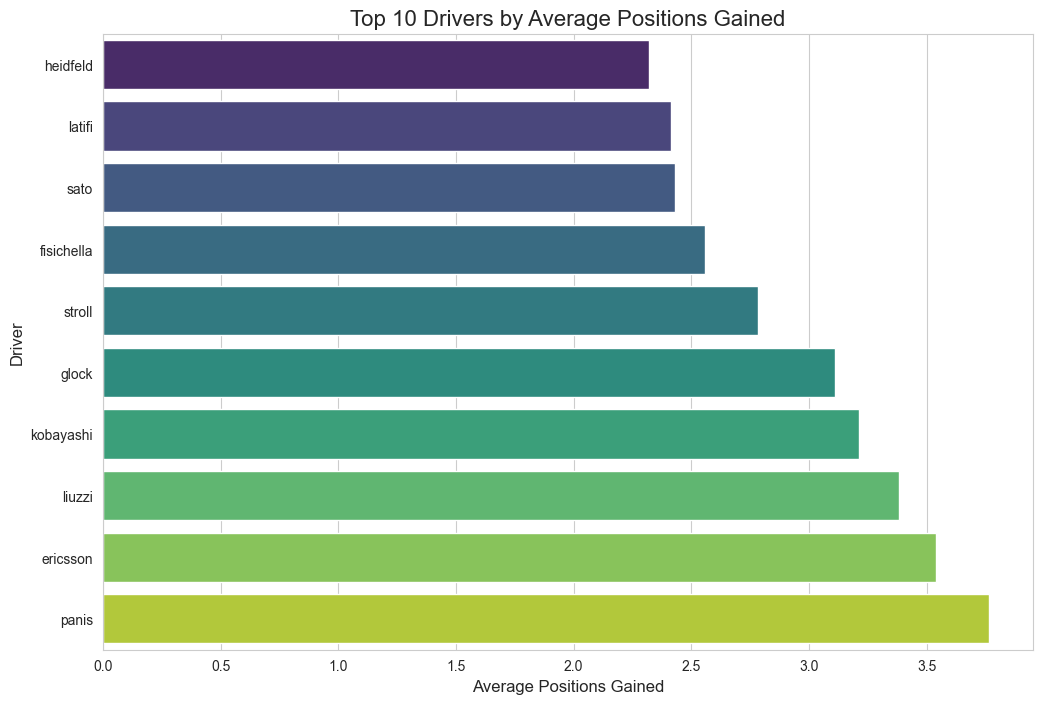

In [40]:
# Cell 9: Driver performance analysis
try:
    # Merge driver names
    merged_with_drivers = pd.merge(
        merged_with_circuits,
        data["drivers"][['driverId', 'driverRef']],
        on='driverId'
    )
    
    # Analyze top drivers (minimum 50 races)
    driver_analysis = merged_with_drivers.groupby('driverRef')['positions_gained'].agg(
        ['mean', 'count']
    ).reset_index()
    driver_analysis = driver_analysis[driver_analysis['count'] >= 50]
    driver_analysis = driver_analysis.sort_values('mean', ascending=False)
    
    print("\nTop 10 drivers by average positions gained (min 50 races):")
    display(driver_analysis.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_drivers = driver_analysis.head(10).sort_values('mean', ascending=True)
    sns.barplot(
        x='mean', 
        y='driverRef', 
        data=top_drivers, 
        palette='viridis'
    )
    plt.title("Top 10 Drivers by Average Positions Gained", fontsize=16)
    plt.xlabel("Average Positions Gained", fontsize=12)
    plt.ylabel("Driver", fontsize=12)
    plt.show()
    
except Exception as e:
    print(f"Driver analysis error: {str(e)}")

In [41]:
# Cell 10: Predictive modeling
try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, r2_score
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    
    # Prepare data for modeling
    model_data = merged_with_circuits[['position_qual', 'name', 'year', 'position_race']].copy()
    
    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('circuit', OneHotEncoder(handle_unknown='ignore'), ['name'])
        ],
        remainder='passthrough'
    )
    
    X = model_data[['position_qual', 'name', 'year']]
    y = model_data['position_race']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Preprocess and train model
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_processed, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test_processed)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Evaluation:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # Feature importance
    feature_names = preprocessor.named_transformers_['circuit'].get_feature_names_out(['circuit'])
    all_feature_names = list(feature_names) + ['position_qual', 'year']
    
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Feature Importances:")
    display(importance_df.head(10))
    
    # Visualization of predictions vs actual
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([1, 25], [1, 25], 'r--')
    plt.title("Actual vs Predicted Race Positions", fontsize=16)
    plt.xlabel("Actual Position", fontsize=12)
    plt.ylabel("Predicted Position", fontsize=12)
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Modeling error: {str(e)}")


Model Evaluation:
Mean Absolute Error: 2.65
R-squared: 0.52
Modeling error: input_features is not equal to feature_names_in_


In [42]:
# Cell 11: Interactive visualizations (Fixed)
try:
    # Install Plotly if needed
    !pip install plotly
    import plotly.express as px
    
    # 1. Interactive scatter plot
    fig = px.scatter(
        merged_with_circuits.sample(2000),
        x='position_qual',
        y='position_race',
        color='era',
        hover_data=['name', 'year'],
        title='Qualifying Position vs Race Position',
        labels={'position_qual': 'Qualifying Position', 'position_race': 'Race Position'},
        trendline='ols'
    )
    fig.add_trace(px.line(x=[1, 25], y=[1, 25]).data[0])
    fig.show()
    
    # 2. Prepare circuit map data
    # Get circuit locations from original circuits data
    circuit_locations = data["circuits"][['name', 'lat', 'lng']].copy()
    
    # Calculate average gains per circuit
    circuit_analysis = merged_with_circuits.groupby('name')['positions_gained'].agg(
        ['mean', 'count']
    ).reset_index()
    
    # Merge with location data
    circuit_map_data = pd.merge(
        circuit_analysis,
        circuit_locations,
        on='name',
        how='left'
    ).dropna(subset=['lat', 'lng'])
    
    # 3. Create interactive circuit map
    fig = px.scatter_geo(
        circuit_map_data,
        lat='lat',
        lon='lng',
        size='count',
        color='mean',
        hover_name='name',
        hover_data={'mean': ':.2f', 'count': True, 'lat': False, 'lng': False},
        projection='natural earth',
        title='Average Position Gain by Circuit',
        color_continuous_scale='viridis_r',
        labels={'mean': 'Avg Positions Gained'}
    )
    fig.update_layout(
        geo=dict(
            showland=True,
            landcolor='rgb(243, 243, 243)',
            countrycolor='rgb(204, 204, 204)'
        )
    )
    fig.show()
    
except Exception as e:
    print(f"Interactive visualization error: {str(e)}")

C:\Users\Support\AppData\Local\Temp\ipykernel_10444\3055139420.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




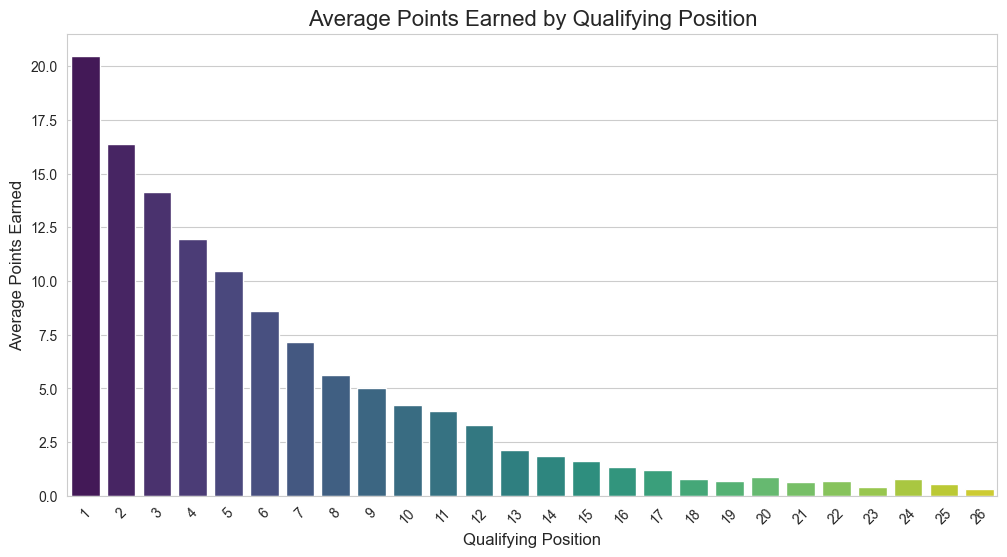


Pole position winners win the race 57.8% of the time


In [43]:
# Cell 13: Championship Point Analysis
try:
    # Calculate points based on finish position
    points_system = {
        1: 25, 2: 18, 3: 15, 4: 12, 5: 10,
        6: 8, 7: 6, 8: 4, 9: 2, 10: 1
    }
    
    merged['points'] = merged['position_race'].map(points_system).fillna(0)
    
    # Analyze points by qualifying position
    points_by_qual = merged.groupby('position_qual')['points'].mean().reset_index()
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='position_qual', y='points', data=points_by_qual, palette='viridis')
    plt.title("Average Points Earned by Qualifying Position", fontsize=16)
    plt.xlabel("Qualifying Position", fontsize=12)
    plt.ylabel("Average Points Earned", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
    
    # Pole position advantage
    pole_winners = merged[merged['position_qual'] == 1]
    pole_win_rate = (pole_winners['position_race'] == 1).mean() * 100
    print(f"\nPole position winners win the race {pole_win_rate:.1f}% of the time")
    
except Exception as e:
    print(f"Points analysis error: {str(e)}")

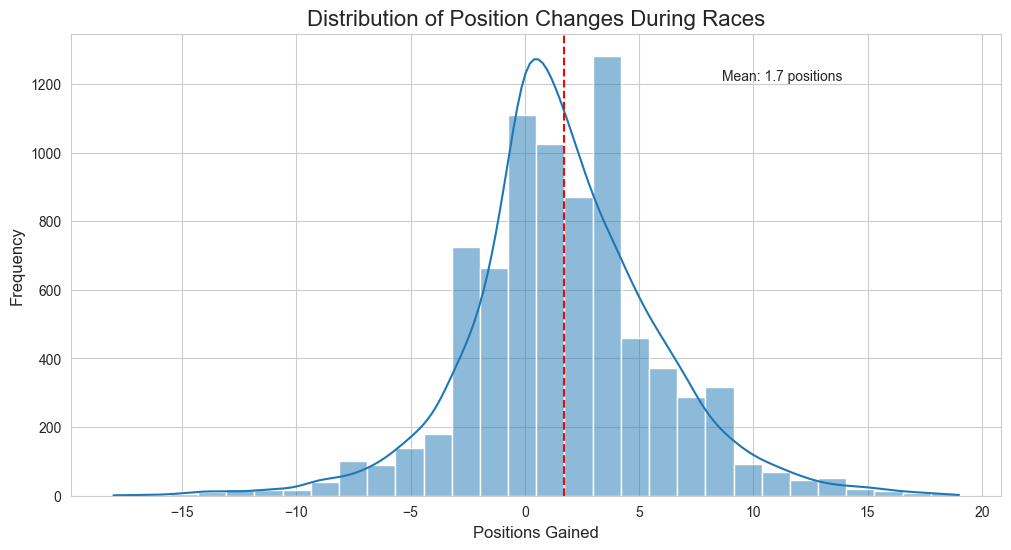

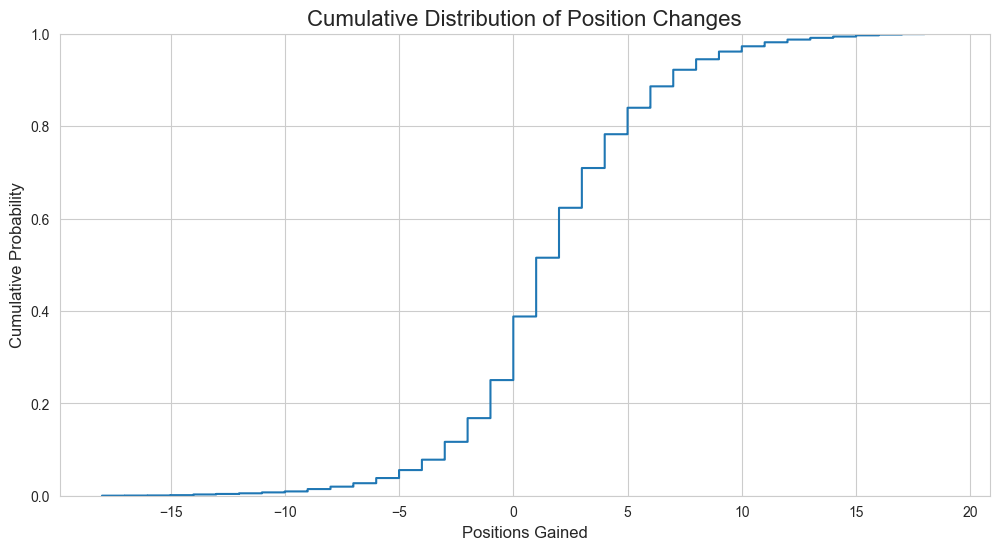

In [44]:
# Cell 14: Position Change Distribution
try:
    plt.figure(figsize=(12, 6))
    
    # Distribution plot
    sns.histplot(merged['positions_gained'], bins=30, kde=True)
    plt.axvline(merged['positions_gained'].mean(), color='r', linestyle='--')
    
    plt.title("Distribution of Position Changes During Races", fontsize=16)
    plt.xlabel("Positions Gained", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.annotate(f"Mean: {merged['positions_gained'].mean():.1f} positions", 
                 xy=(0.7, 0.9), xycoords='axes fraction')
    plt.show()
    
    # Cumulative distribution
    plt.figure(figsize=(12, 6))
    sns.ecdfplot(merged['positions_gained'])
    plt.title("Cumulative Distribution of Position Changes", fontsize=16)
    plt.xlabel("Positions Gained", fontsize=12)
    plt.ylabel("Cumulative Probability", fontsize=12)
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Distribution analysis error: {str(e)}")

In [49]:
# Cell 15: Season Progression Analysis (Simplified and Fixed)
try:
    # Add circuit locations if missing
    if 'lat' not in merged_with_circuits.columns:
        circuit_location = data["circuits"][['circuitId', 'lat', 'lng']]
        merged_with_circuits = pd.merge(
            merged_with_circuits,
            circuit_location,
            on='circuitId',
            how='left'
        )
    
    # Prepare data for animation
    animation_df = merged_with_circuits.groupby(['name', 'year', 'lat', 'lng']).agg(
        avg_gain=('positions_gained', 'mean'),
        race_count=('raceId', 'count')
    ).reset_index()
    
    # Convert year to integer and filter out future years
    animation_df['year'] = animation_df['year'].astype(int)
    animation_df = animation_df[animation_df['year'] <= 2023]
    
    # Create size column using absolute values
    animation_df['size'] = animation_df['avg_gain'].abs()
    
    # Sort by year for correct animation sequence
    animation_df = animation_df.sort_values('year')
    
    # Create animated map with SORTED years
    # Get sorted unique years for correct animation order
    sorted_years = sorted(animation_df['year'].unique())
    
    fig = px.scatter_geo(
        animation_df,
        lat='lat',
        lon='lng',
        size='size',
        color='avg_gain',
        hover_name='name',
        hover_data={
            'avg_gain': ':.2f',
            'year': True,
            'lat': False,
            'lng': False,
            'size': False
        },
        animation_frame='year',
        animation_group='name',  # Important for maintaining consistent markers
        projection='natural earth',
        title='Evolution of Position Gains by Circuit (1950-2023)',
        color_continuous_scale='balance',
        color_continuous_midpoint=0,
        range_color=[-5, 5],
        category_orders={'year': sorted_years}  # Ensure correct order
    )
    
    # Update layout
    fig.update_layout(
        geo=dict(
            showland=True,
            landcolor='rgb(243, 243, 243)',
            countrycolor='rgb(204, 204, 204)'
        ),
        coloraxis_colorbar=dict(
            title='Avg Positions Gained',
            tickvals=[-5, -2.5, 0, 2.5, 5],
            ticktext=['-5 (Loss)', '-2.5', '0', '+2.5', '+5 (Gain)']
        ),
        # Explicitly set frame duration and transition
        updatemenus=[{
            'type': 'buttons',
            'buttons': [{
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                'fromcurrent': True,
                                'transition': {'duration': 300}}],
                'label': 'Play',
                'method': 'animate'
            }, {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }]
        }]
    )
    
    # Update marker size range
    fig.update_traces(marker=dict(sizemode='area', sizeref=0.1))
    
    # Adjust frame settings
    for frame in fig.frames:
        frame.layout.geo = fig.layout.geo  # Maintain consistent map settings
    
    fig.show()
    
except Exception as e:
    print(f"Animation error: {str(e)}")
    # Print sample data if available
    if 'animation_df' in locals():
        print("\nFirst 5 years in animation data:", animation_df['year'].unique()[:5])
        print("Last 5 years in animation data:", animation_df['year'].unique()[-5:])

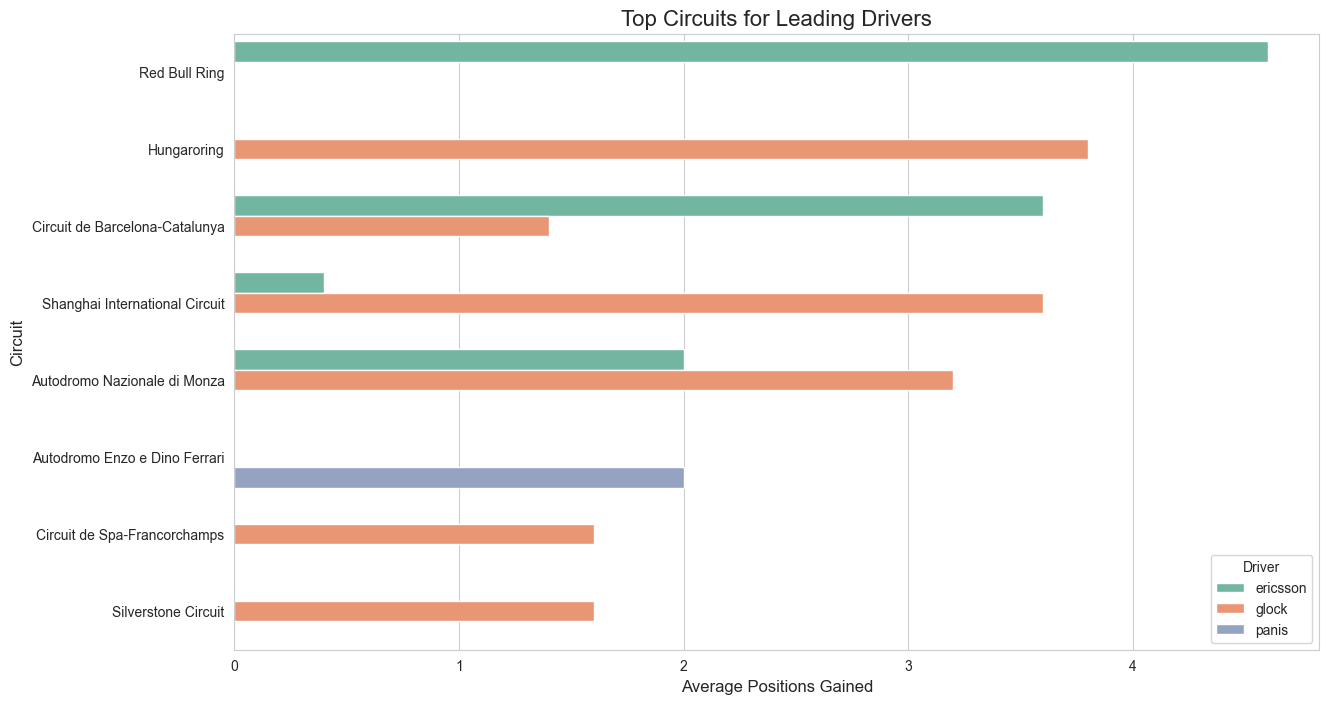

In [50]:
# Cell 16: Driver-Circuit Specialization
try:
    # Calculate driver performance by circuit
    driver_circuit = merged_with_drivers.groupby(['driverRef', 'name'])['positions_gained'].agg(
        ['mean', 'count']
    ).reset_index()
    driver_circuit = driver_circuit[driver_circuit['count'] >= 5]  # Min 5 races at circuit
    
    # Find best circuits for top drivers
    top_drivers = driver_analysis.head(5)['driverRef'].tolist()
    driver_circuit_top = driver_circuit[driver_circuit['driverRef'].isin(top_drivers)]
    
    # Visualization
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='mean', 
        y='name', 
        hue='driverRef',
        data=driver_circuit_top.sort_values('mean', ascending=False).head(20),
        palette='Set2'
    )
    plt.title("Top Circuits for Leading Drivers", fontsize=16)
    plt.xlabel("Average Positions Gained", fontsize=12)
    plt.ylabel("Circuit", fontsize=12)
    plt.legend(title='Driver', loc='lower right')
    plt.show()
    
except Exception as e:
    print(f"Driver-circuit analysis error: {str(e)}")

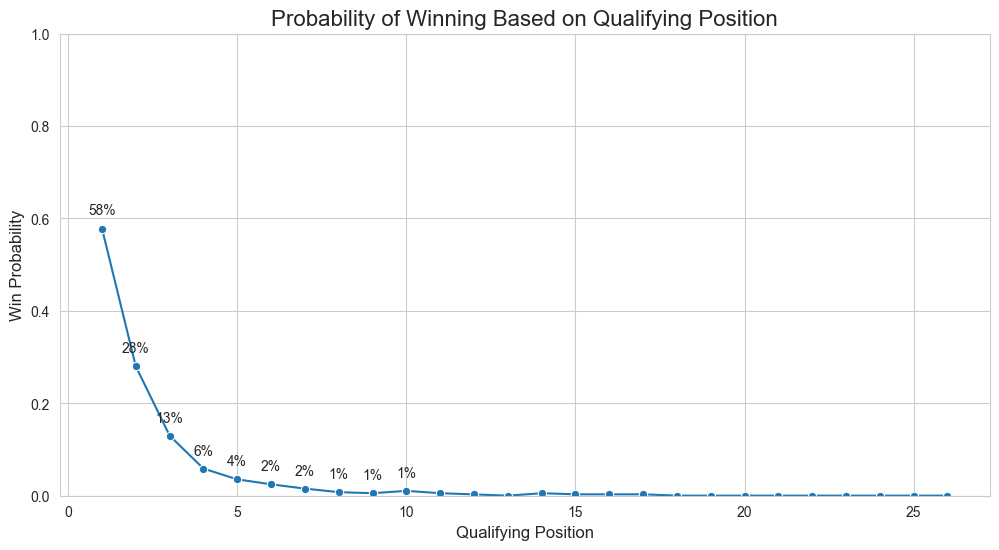

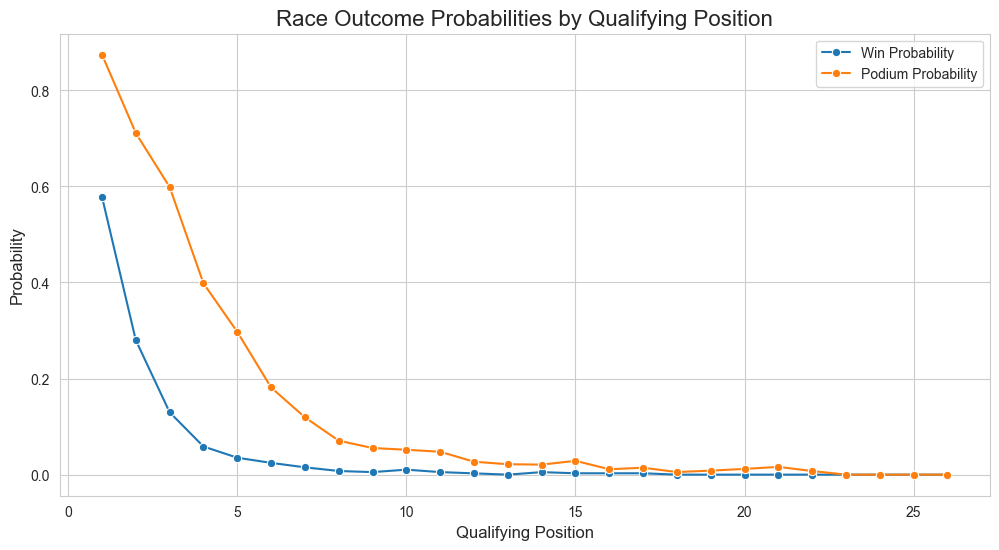

In [51]:
# Cell 17: Win Probability Analysis
try:
    # Calculate win probability from qualifying position
    win_prob = merged.groupby('position_qual')['position_race'].apply(
        lambda x: (x == 1).mean()
    ).reset_index()
    win_prob.columns = ['qual_position', 'win_probability']
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='qual_position', y='win_probability', data=win_prob, marker='o')
    plt.title("Probability of Winning Based on Qualifying Position", fontsize=16)
    plt.xlabel("Qualifying Position", fontsize=12)
    plt.ylabel("Win Probability", fontsize=12)
    plt.ylim(0, 1)
    plt.grid(True)
    
    # Add annotations
    for i, row in win_prob[win_prob['qual_position'] <= 10].iterrows():
        plt.annotate(f"{row['win_probability']:.0%}", 
                    (row['qual_position'], row['win_probability'] + 0.03),
                    ha='center')
    
    plt.show()
    
    # Podium probability
    podium_prob = merged.groupby('position_qual')['position_race'].apply(
        lambda x: x.isin([1, 2, 3]).mean()
    ).reset_index()
    podium_prob.columns = ['qual_position', 'podium_probability']
    
    # Combine into one plot
    prob_df = win_prob.merge(podium_prob, on='qual_position')
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='qual_position', y='win_probability', data=prob_df, label='Win Probability', marker='o')
    sns.lineplot(x='qual_position', y='podium_probability', data=prob_df, label='Podium Probability', marker='o')
    plt.title("Race Outcome Probabilities by Qualifying Position", fontsize=16)
    plt.xlabel("Qualifying Position", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Probability analysis error: {str(e)}")


Constructors by Average Positions Gained (Min 100 races):


,constructor_name,mean,count
28,Minardi,5.782258,124
35,Sauber,3.060870,460
18,Jordan,2.773723,137
42,Toro Rosso,2.054863,401
22,Lotus F1,1.913043,115
4,Aston Martin,1.756250,160
12,Force India,1.738506,348
0,Alfa Romeo,1.629834,181
34,Renault,1.457002,407
2,Alpine F1 Team,1.303226,155


C:\Users\Support\AppData\Local\Temp\ipykernel_10444\1406575060.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




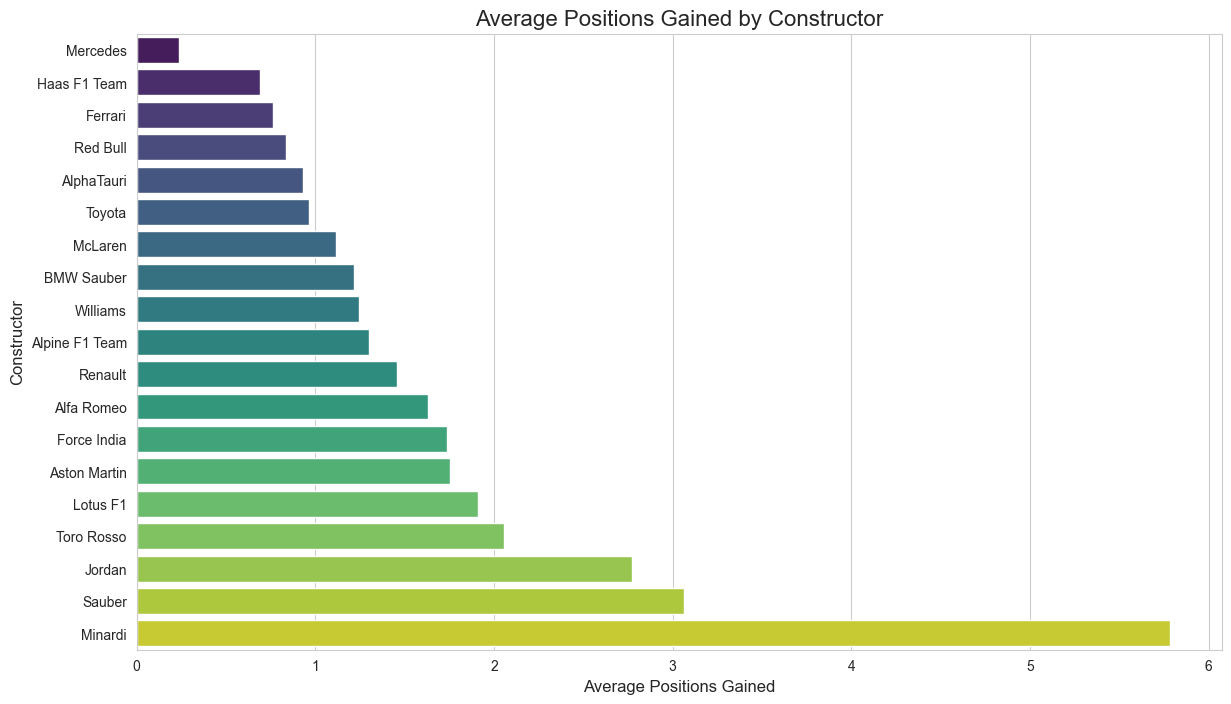

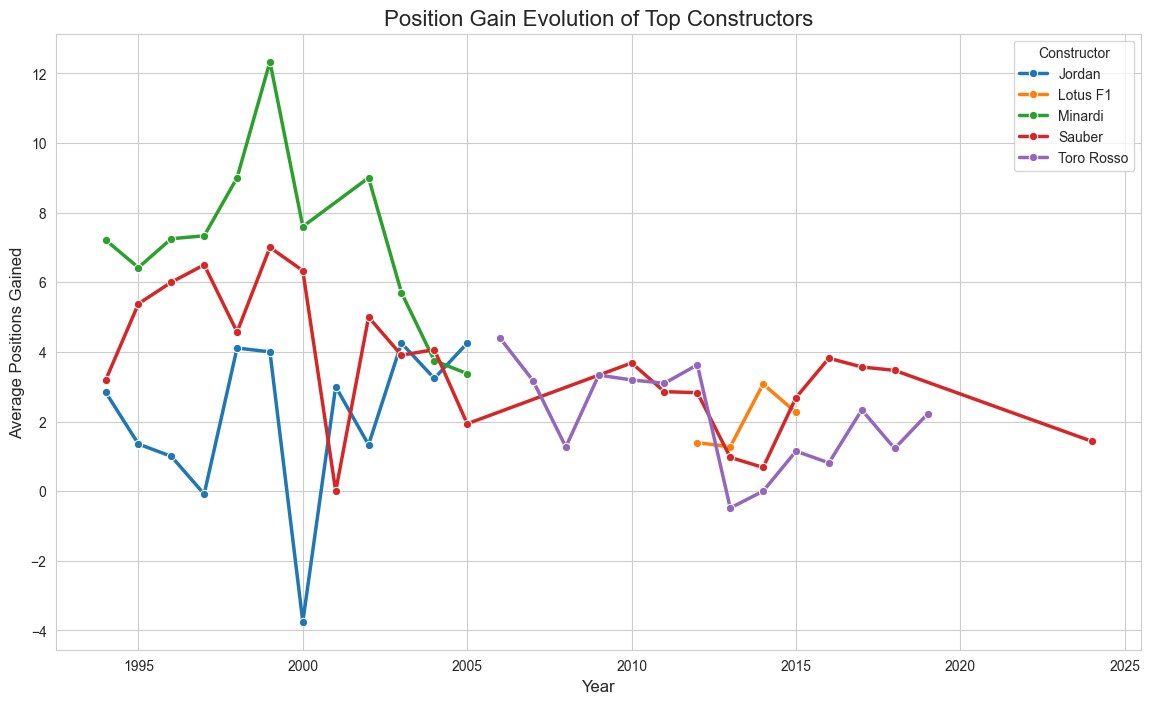

In [55]:
# Cell 18: Constructor Analysis (Fixed)
try:
    # First ensure we have constructors data
    if 'constructors' not in data:
        # Try loading if missing
        try:
            constructors_path = os.path.join(project_folder, 'constructors.csv')
            data['constructors'] = pd.read_csv(constructors_path)
            print("Loaded constructors.csv")
        except:
            print("ERROR: Could not load constructors.csv")
            raise
    
    # Merge with constructor data
    merged_constructor = pd.merge(
        merged_with_circuits,
        data["results"][['raceId', 'driverId', 'constructorId']],
        on=['raceId', 'driverId']
    )
    merged_constructor = pd.merge(
        merged_constructor,
        data["constructors"][['constructorId', 'name']].rename(columns={'name': 'constructor_name'}),
        on='constructorId'
    )
    
    # Analyze by constructor
    constructor_analysis = merged_constructor.groupby('constructor_name')['positions_gained'].agg(
        ['mean', 'count']
    ).reset_index()
    
    # Filter to constructors with sufficient data
    constructor_analysis = constructor_analysis[constructor_analysis['count'] >= 100]
    constructor_analysis = constructor_analysis.sort_values('mean', ascending=False)
    
    print("\nConstructors by Average Positions Gained (Min 100 races):")
    display(constructor_analysis.head(15))
    
    # Visualization
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='mean', 
        y='constructor_name', 
        data=constructor_analysis.sort_values('mean', ascending=True),
        palette='viridis'
    )
    plt.title("Average Positions Gained by Constructor", fontsize=16)
    plt.xlabel("Average Positions Gained", fontsize=12)
    plt.ylabel("Constructor", fontsize=12)
    plt.show()
    
    # Evolution of top teams
    if 'year' in merged_constructor.columns:
        top_constructors = constructor_analysis.head(5)['constructor_name'].tolist()
        constructor_evolution = merged_constructor[merged_constructor['constructor_name'].isin(top_constructors)]
        constructor_evolution = constructor_evolution.groupby(['constructor_name', 'year'])['positions_gained'].mean().reset_index()
        
        plt.figure(figsize=(14, 8))
        sns.lineplot(
            x='year', 
            y='positions_gained', 
            hue='constructor_name',
            data=constructor_evolution,
            marker='o',
            linewidth=2.5
        )
        plt.title("Position Gain Evolution of Top Constructors", fontsize=16)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Average Positions Gained", fontsize=12)
        plt.legend(title='Constructor')
        plt.grid(True)
        plt.show()
    
except Exception as e:
    print(f"Constructor analysis error: {str(e)}")